In [14]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
os.chdir(os.getcwd())

In [15]:
crf_dev = pd.read_csv('Results/CRF_dev_result.csv')
crf_test = pd.read_csv('Results/CRF_test_result.csv')

svm_dev = pd.read_csv('Results/SVM_dev_result.csv')
svm_test = pd.read_csv('Results/SVM_test_result.csv')

In [3]:
class Format:
    end = '\033[0m'
    underline = '\033[4m'
    bold = '\033[1m'

def classify_predictions(row, pred_column):
    
    if row[pred_column] == row['Negation_cue']:
        
        if row[pred_column] == 'O':
            return 'TN'
        return 'TP'
    
    if row[pred_column] in ['B-NEG', 'I-NEG']:
        return 'FP'
    
    return 'FN'

def construct_sentence(df):
    sentence = ''
    
    for token in df.Token:
        if token in ['.', ',', '?', '!']:
            sentence += token
        else:
            sentence += ' ' + token
    
    return sentence[1:]

def print_error(df, error, pred_column):
    
    error = df[df['class'] == error]
    error_trigram = error.trigram.values[0]
    print('Error:', Format.underline, error_trigram, Format.end, '\t',
         f'Predicted: {error[pred_column].values[0]}; Actual: {error.Negation_cue.values[0]}')
    
    sentence = construct_sentence(df)
    print(sentence, '\n')
    
def print_errors(df, pred_column):
    
    df['class'] = df.apply(classify_predictions, args=(pred_column,), axis=1)
    
    FP_sentences = df[df['class'] == 'FP'].idx_sent.values
    FN_sentences = df[df['class'] == 'FN'].idx_sent.values
    
    print('\nNumber of False Positives:', Format.bold, len(FP_sentences), Format.end)
    print('Number of False Negatives:', Format.bold, len(FN_sentences), Format.end)
    print('F1-score:                 ', Format.bold, round(f1_score(df.Negation_cue, df[pred_column], average='weighted'),4), Format.end, '\n\n')
    
    print(Format.bold + 'False Positives' + Format.end, '\n')
    for sentence_id in FP_sentences:
        print_error(df[df.idx_sent == sentence_id], 'FP', pred_column)
    
    print('\n\n', Format.bold + 'False Negatives' + Format.end, '\n')
    for sentence_id in FN_sentences:
        print_error(df[df.idx_sent == sentence_id], 'FN', pred_column)

def print_confusion_matrix(prediction, actual):
    confusion_matrix = pd.crosstab(actual, prediction, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)
    plt.suptitle('Confusion matrix')
    plt.show()

def error_analysis(df, pred_column):
    
    print('\t\t', Format.bold, 'ERROR ANALYSIS', Format.end, '\n\n')
    print_confusion_matrix(df[pred_column], df.Negation_cue)
    print_errors(df, pred_column)

		  ERROR ANALYSIS  




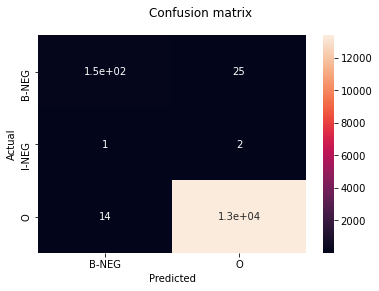


Number of False Positives:  15 
Number of False Negatives:  27 
F1-score:                   0.9968  


False Positives 

Error:  but none the  	 Predicted: B-NEG; Actual: O
Private detectives are a class with whom I have absolutely no sympathy, but none the less, having heard your name -- " 

Error:  , no doubt  	 Predicted: B-NEG; Actual: O
" You traced him through the telegram, no doubt, " said Holmes. 

Error:  it not ?  	 Predicted: B-NEG; Actual: O
" All you desire is a plain statement, is it not? " 

Error:  smoking endless cigarettes  	 Predicted: B-NEG; Actual: O
He gave up all pretence at conversation and sat, smoking endless cigarettes, lost in his own thoughts, but he made no remark as to the contents. 

Error:  and no pains  	 Predicted: B-NEG; Actual: O
I desire you to spare no expense and no pains to get at the truth. " 

Error:  by no means  	 Predicted: B-NEG; Actual: I-NEG
" Remarkable, but by no means impossible, " said Holmes, smiling. 

Error:  " No doubt  	 Predic

In [13]:
error_analysis(svm_dev, 'pred_SVM')